In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-pastel')

In [32]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
X = df.values[:,1:]
Y = df.values[:,0]
print(X.shape,Y.shape)

(20000, 784) (20000,)


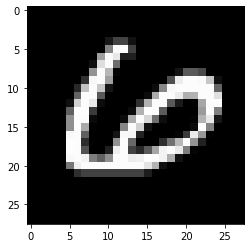

6


In [33]:
def showImg(sample):
  img = sample.reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.show()

showImg(X[0])
print(Y[0])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=54)

In [35]:
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

In [36]:
def knn(X,Y,query,k=10):
  m = X.shape[0]
  dist = []
  for i in range(m):
    d = distance(X[i],query)
    dist.append((d,Y[i]))
  dist = sorted(dist)
  dist = dist[:k]
  # print(dist)
  dist = np.array(dist)
  unq = np.unique(dist[:,1],return_counts=True)
  ind = unq[1].argmax()
  return int(unq[0][ind])

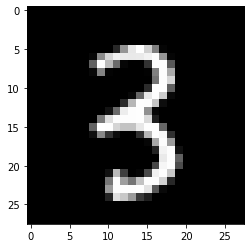

Prediction: 3


In [40]:
pred = knn(X_train,Y_train,X_test[5])
showImg(X_test[5])
print("Prediction:",pred)